In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ablation_augmentation.csv')

In [3]:
df["collection"] = df.Name.apply(lambda x: x.split("_")[0])
df["augmentation"] = df.Name.apply(lambda x: x.split("_", 1)[1].replace("augmentation_", "").replace("no_augmentation", "baseline"))
df["uuid"] = df["Run ID"]
relevant_columns = ["uuid", "collection", "augmentation", "Duration", "val_monitored_accuracy", "val_monitored_loss"] + [c for c in df.columns if "results" in c]
dfsummary = df[relevant_columns]
dfsummary

,uuid,collection,augmentation,Duration,val_monitored_accuracy,val_monitored_loss,results_Alto35,results_Bass35,results_HarmonicRhythm7,results_LocalKey38,results_PitchClassSet121,results_RomanNumeral31,results_Soprano35,results_Tenor35,results_TonicizedKey38,results_satbRomanNumeral
0,3f97c33d30cc422787436254ea9ba1d4,wir,both,4.9h,0.823737,5.777431,0.774,0.825,0.823,0.774,0.811,0.669,0.799,0.794,0.801,0.523
1,17399aef1352441495abf6470ce267c8,wir,synthetic,26.1min,0.776963,9.923491,0.726,0.800,0.757,0.668,0.753,0.529,0.736,0.757,0.727,0.391
2,ba64239a8048457188cd02fe5f550ebc,wir,transposition,2.2h,0.827930,5.685518,0.770,0.826,0.846,0.758,0.804,0.656,0.792,0.792,0.783,0.493
3,259247c0424542d4899ac26f311b5a9a,wir,baseline,12.8min,0.761154,9.815894,0.722,0.805,0.764,0.631,0.721,0.503,0.724,0.738,0.685,0.366
4,f1cbda482fa84e09b415817b4b6e59e6,tavern,both,5.2h,0.780040,7.780500,0.705,0.758,0.795,0.872,0.766,0.691,0.750,0.724,0.865,0.500
5,3bc01803f5864a0b9dd80792cd0dd6f5,tavern,synthetic,29.3min,0.722401,13.090388,0.648,0.708,0.745,0.818,0.718,0.595,0.690,0.663,0.830,0.393
6,64223985a84944d98ad8750e7e9673bf,tavern,transposition,2.4h,0.773562,8.795104,0.726,0.770,0.804,0.855,0.764,0.658,0.743,0.746,0.843,0.495
7,287adcd2ca09428fa3d4a2f7df92ead2,tavern,baseline,15.7min,0.694230,13.601041,0.655,0.704,0.736,0.761,0.685,0.547,0.660,0.663,0.812,0.368
8,72105953dac64e289a65827d70e41e66,mps,both,3.0h,0.820409,6.061065,0.748,0.794,0.822,0.904,0.837,0.738,0.803,0.785,0.901,0.579
9,a5b6fa34e6be437797cb8938eb7aa74c,mps,synthetic,17.9min,0.756834,10.277494,0.688,0.769,0.747,0.817,0.770,0.616,0.762,0.745,0.852,0.438


In [4]:
for dataset in dfsummary.collection.unique():
    dfdataset = dfsummary[dfsummary.collection == dataset]
    metrics = ["collection", "augmentation", "val_monitored_accuracy", "val_monitored_loss"]
    print(dfdataset[metrics].sort_index())

  collection   augmentation  val_monitored_accuracy  val_monitored_loss
0        wir           both                0.823737            5.777431
1        wir      synthetic                0.776963            9.923491
2        wir  transposition                0.827930            5.685518
3        wir       baseline                0.761154            9.815894
  collection   augmentation  val_monitored_accuracy  val_monitored_loss
4     tavern           both                0.780040            7.780500
5     tavern      synthetic                0.722401           13.090388
6     tavern  transposition                0.773562            8.795104
7     tavern       baseline                0.694230           13.601041
   collection   augmentation  val_monitored_accuracy  val_monitored_loss
8         mps           both                0.820409            6.061065
9         mps      synthetic                0.756834           10.277494
10        mps  transposition                0.828760         

In [5]:
dfdict = {"dataset": [], "augmentation": [], "epoch": [], "val_monitored_accuracy": [], "val_monitored_loss": []}
for run in dfsummary.itertuples():
    uuid = run.uuid
    dataset = run.collection
    augmentation = run.augmentation
    metricsPath = f"mlruns/1/{uuid}/metrics" 
    dfacc = pd.read_csv(f"{metricsPath}/val_monitored_accuracy", sep=" ", header=None)
    dfloss = pd.read_csv(f"{metricsPath}/val_monitored_loss", sep=" ", header=None)
    epochs = len(dfacc.index)
    dfdict["dataset"] += [dataset] * epochs
    dfdict["augmentation"] += [augmentation] * epochs
    dfdict["epoch"] += list(range(epochs))
    dfdict["val_monitored_accuracy"] += dfacc[1].to_list()
    dfdict["val_monitored_loss"] += dfloss[1].to_list()


In [109]:
dfperf = pd.DataFrame(dfdict)

In [110]:
loss_max_val = 10
acc_min_val = 0.6
dfperf["val_monitored_loss"] = dfperf["val_monitored_loss"].apply(lambda x: min(loss_max_val, x))
dfperf["val_monitored_accuracy"] = dfperf["val_monitored_accuracy"].apply(lambda x: max(acc_min_val, x))
mean_loss_global = dfperf.val_monitored_loss.mean()
mean_acc_global = dfperf.val_monitored_accuracy.mean()
print(mean_loss_global, mean_acc_global)
for dataset in dfperf.dataset.unique():
    # Move each dataset to be close to the mean
    dfdataset = dfperf[dfperf.dataset == dataset]
    mean_loss = dfdataset.val_monitored_loss.mean()
    mean_acc = dfdataset.val_monitored_accuracy.mean()
    offset_loss = mean_loss_global - mean_loss
    offset_acc = mean_acc_global - mean_acc
    dfperf.loc[dfdataset.index, "val_monitored_loss"] += offset_loss
    dfperf.loc[dfdataset.index, "val_monitored_accuracy"] += offset_acc

7.75414517358145 0.7517370085424433


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
names = {
    "baseline": "Baseline",
    "synthetic": "Synthesis",
    "transposition": "Transposition",
    "both": "Synthesis and Transposition"
}
dfperf["augmentation"] = dfperf["augmentation"].apply(lambda x: names[x])

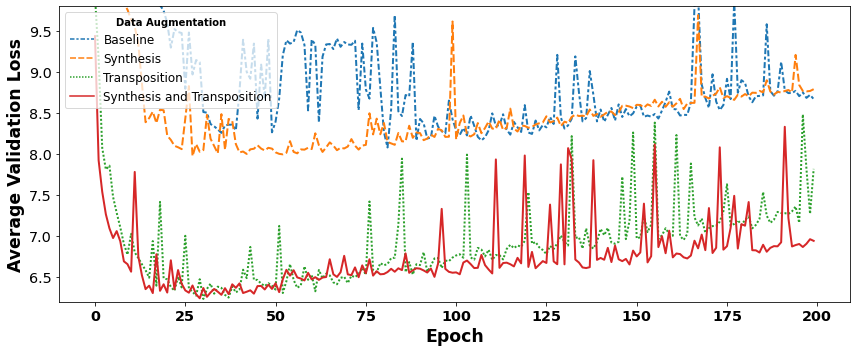

In [186]:
plt.rcParams["figure.figsize"] = (12, 5)
hue_order = ["Baseline", "Synthesis", "Transposition", "Synthesis and Transposition"]
# sns.lineplot(x="epoch", y="val_monitored_loss", hue="augmentation", style="augmentation", palette="colorblind", ci=None, data=dfperf[dfperf.dataset == "keymodt"])
sns.lineplot(x="epoch", y="val_monitored_loss", hue="augmentation", hue_order=hue_order, style="augmentation", markers=False, palette="tab10", ci=None, lw=2, data=dfperf)

plt.legend(loc="upper left", fontsize="large", framealpha=0.75, title="Data Augmentation", title_fontproperties={"weight": "bold"})
plt.xlabel(f"Epoch", fontsize="xx-large", fontweight="bold")
plt.xticks(fontsize="x-large", fontweight="bold")
plt.ylabel("Average Validation Loss", fontsize="xx-large", fontweight="bold")
plt.yticks(fontsize="x-large")
plt.ylim(6.2, 9.8)
plt.tight_layout()
plt.savefig("ablation_augmentation_loss.png")


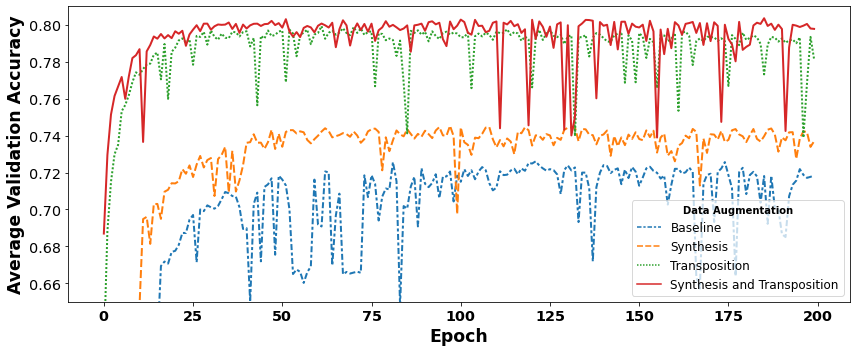

In [187]:
plt.rcParams["figure.figsize"] = (12, 5)
hue_order = ["Baseline", "Synthesis", "Transposition", "Synthesis and Transposition"]
sns.lineplot(x="epoch", y="val_monitored_accuracy", hue="augmentation", hue_order=hue_order, style="augmentation", palette="tab10", markers=False, ci=None, lw=2, data=dfperf)

plt.legend(loc="lower right", fontsize="large", framealpha=0.75, title="Data Augmentation", title_fontproperties={"weight": "bold"})
plt.xlabel(f"Epoch", fontsize="xx-large", fontweight="bold")
plt.xticks(fontsize="x-large", fontweight="bold")
plt.ylabel("Average Validation Accuracy", fontsize="xx-large", fontweight="bold")
plt.yticks(fontsize="x-large")
plt.ylim(0.65, 0.81)
plt.tight_layout()
plt.savefig("ablation_augmentation_accuracy.png")

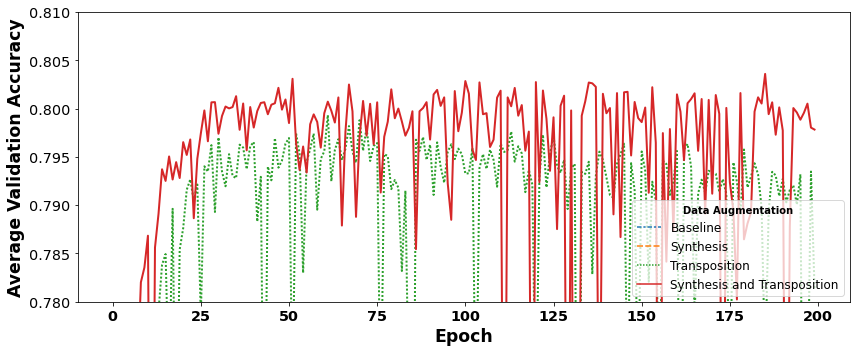

In [188]:
plt.rcParams["figure.figsize"] = (12, 5)
hue_order = ["Baseline", "Synthesis", "Transposition", "Synthesis and Transposition"]
sns.lineplot(x="epoch", y="val_monitored_accuracy", hue="augmentation", hue_order=hue_order, style="augmentation", palette="tab10", markers=False, ci=None, lw=2, data=dfperf)

plt.legend(loc="lower right", fontsize="large", framealpha=0.75, title="Data Augmentation", title_fontproperties={"weight": "bold"})
plt.xlabel(f"Epoch", fontsize="xx-large", fontweight="bold")
plt.xticks(fontsize="x-large", fontweight="bold")
plt.ylabel("Average Validation Accuracy", fontsize="xx-large", fontweight="bold")
plt.yticks(fontsize="x-large")
plt.ylim(0.78, 0.81)
plt.tight_layout()
plt.savefig("ablation_augmentation_accuracy.png")

In [247]:
dfmetrics = dfsummary.drop(["uuid", "val_monitored_accuracy", "val_monitored_loss", "Duration", "results_satbRomanNumeral"], axis=1)
dftable = pd.DataFrame(index=[c for c in dfmetrics.collection.unique()])
dfmetrics
for collection in dfmetrics.collection.unique():
    print(collection)
    dfcol = dfmetrics[dfmetrics.collection == collection]
    for augmentation in dfcol.augmentation.unique():
        print("\t", augmentation)
        dfaug = dfcol[dfcol.augmentation == augmentation]
        mean = 100 * dfaug.mean().mean()
        std = 100 * dfaug.mean().std()
        # print(mean)
        # print(dfaug.mean().mean(), dfaug.mean().std())
        dftable.loc[collection, augmentation] = f"{mean.round(1)} ± {std.round(2)}"

wir
	 both
	 synthetic
	 transposition
	 baseline
tavern
	 both
	 synthetic
	 transposition
	 baseline
mps
	 both
	 synthetic
	 transposition
	 baseline
keymodt
	 both


/tmp/ipykernel_8332/3977018694.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = 100 * dfaug.mean().mean()
/tmp/ipykernel_8332/3977018694.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = 100 * dfaug.mean().std()
/tmp/ipykernel_8332/3977018694.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = 100 * dfaug.mean().mean()
/tmp/ipykernel_8332/3977018694.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is depre

	 synthetic
	 transposition
	 baseline
haydnsun
	 both
	 synthetic
	 transposition
	 baseline
bps
	 both
	 synthetic
	 transposition
	 baseline
abc
	 both
	 synthetic
	 transposition
	 baseline


In [251]:
print(dftable)
dftable.sort_index(ascending=True).to_csv("augmentation_results.csv")

                 both    synthetic transposition      baseline
wir       78.6 ± 4.74  71.7 ± 7.88    78.1 ± 5.4   69.9 ± 8.79
tavern    77.0 ± 6.44  71.3 ± 7.66   76.8 ± 6.07   69.1 ± 7.55
mps       81.5 ± 5.89  75.2 ± 6.86    81.8 ± 5.9   73.2 ± 7.52
keymodt    88.7 ± 3.6  81.6 ± 6.65   85.3 ± 5.84   78.8 ± 6.02
haydnsun  68.7 ± 6.87  59.4 ± 9.64   68.2 ± 8.61  54.4 ± 11.76
bps        75.7 ± 5.7  64.6 ± 6.62   74.7 ± 5.89   62.5 ± 9.25
abc       72.2 ± 5.71   67.2 ± 7.0   70.7 ± 6.09   65.2 ± 7.04
